# Skin Cancer Classification -- What are we going to do today!


The following article introduces this work done by Andre Esteva and his team, Dermatologist-level classification of skin cancer with deep neural networks.

The versatility of the smartphone is starting to have a serious impact in the medical world, with the ability to reveal low red blood cell counts, sleep apnea and even HIV all very real possibilities. Skin cancer too is a condition that might feel the wrath of these modern diagnostic tools, with an iPhone app way back in 2011 offering risk assessments on suspect moles. But a new research project at Stanford University is promising to bring things up to a professional grade of diagnosis, through a deep learning algorithm that can detect potential cancers with the same accuracy as dermatologists in early tests.

As is the case with all cancers, early detection of skin cancer is critical to survival rates. For melanoma detected in its early stages, the five-year survival rate is 97 percent, but those detected in its later stages carry a survival rate of just 14 percent. However, not everybody has ready access or the funds to drop by the doctor's office and get their skin oddities checked out as soon as they appear.

#### Step 0: Getting the data

A bit about data and pre-processing

#### Step 1: Importing necessary modules

#### Step 2: Loading a pre-trained module already 

Something about the pre-trained models such as InceptionV3, ResNets, GoogLeNet etc

#### Step 3: Pre-processing the data

#### Step 4: Building your model

#### Step 5: Training your model

#### Step 6: Doing some Transfer Learning

#### Step 7: Prediction function and classifying images

#### Addendum : Lot's of Rinse and Repeat in between  😀

WQe do a lot of stuff such as playing around with the learning_rate, 

#### Addendum on Steroids : Homework Exercise

1. Build an App with Android (using TensorFlow Lite) or iOS (Apple's coreML package)

###### Useful Links:
1. [Stanford article](https://news.stanford.edu/2017/01/25/artificial-intelligence-used-identify-skin-cancer/)
2. [Other news - Startup Grind](https://medium.com/startup-grind/how-can-ai-detect-skin-cancer-with-your-smartphone-df65cf040d48)
3. [Research paper](https://www.nature.com/articles/nature21056.epdf)

Notes: [Waya.ai's link gone dead](https://blog.waya.ai/ground-up-hands-on-deep-learning-tutorial-diagnosing-skin-cancer-w-dermatologist-level-61a90fe9f269)

4. More useful links as of Jan 2018 - see if still workds else modify the code to do so:
[ISIC Archive downloader : ](https://github.com/GalAvineri/ISIC-Archive-Downloader)

5. [Original contest was here: ](https://challenge.kitware.com/#phase/5840f53ccad3a51cc66c8dab)
[Udacity's wrapper on the contest is here -->](https://github.com/udacity/dermatologist-ai)
[Dasato](https://dasoto.github.io/skincancer/)

6. More links for ideas: [VGG, scrape and more](https://github.com/tanmoyopenroot/cancer_nn) | [Skin-Lesion-Analysis](https://github.com/JiteshPshah/Skin-Lesion-Analysis-Towards-Melanoma-Detection) | [RECOD guys](https://github.com/learningtitans/isbi2017-part3), [train_image](https://github.com/learningtitans/isbi2017-part3/blob/master/train_image_classifier.py) | [Inception modules explained](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/) | [VGG transfer learning](https://github.com/swapnilpote/isic-2017) | Note to self : SqueezeNet , MobileNet


**Before we start** [No need to do this on your own server though), [more information look here](https://www.tensorflow.org/programmers_guide/using_gpu)

```python

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config, ...)
```
**GET THESE INTO your direcory called "data"
```shell
mkdir data
wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip
wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip
wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip
```

## Step 1 : Import the necessary modules 

Go ahead and import the following:
InceptionV3, preprocessing....

In [3]:
import keras
from keras.applications import inception_v3

## Step 2 : Load the pre-trained model 

More about the [pre-trained models](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/)

In [4]:
"""
Signature: InceptionV3(include_top=True, weights='imagenet', input_tensor=None, 
input_shape=None, pooling=None, classes=1000)
Docstring:
Instantiates the Inception v3 architecture.

Optionally loads weights pre-trained
on ImageNet. Note that when using TensorFlow,
for best performance you should set
`image_data_format='channels_last'` in your Keras config
at ~/.keras/keras.json.
The model and the weights are compatible with both
TensorFlow and Theano. The data format
convention used by the model is the one
specified in your Keras config file.
Note that the default input image size for this model is 299x299.

# Arguments
    include_top: whether to include the fully-connected
        layer at the top of the network.
    weights: one of `None` (random initialization)
        or 'imagenet' (pre-training on ImageNet).
    input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
        to use as image input for the model.
    input_shape: optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(299, 299, 3)` (with `channels_last` data format)
        or `(3, 299, 299)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 139.
        E.g. `(150, 150, 3)` would be one valid value.
    pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` means that the output of the model will be
            the 4D tensor output of the
            last convolutional layer.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional layer, and thus
            the output of the model will be a 2D tensor.
        - `max` means that global max pooling will
            be applied.
    classes: optional number of classes to classify images
        into, only to be specified if `include_top` is True, and
        if no `weights` argument is specified.

# Returns
    A Keras model instance.
"""
base_model = inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
print('loaded model')

loaded model


## Step 3 : Pre-processing the data

- Read more on Keras documentation [here](https://keras.io/preprocessing/image/)

An example:
```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```    

Example code:

```python
# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

```

In [8]:
from keras.preprocessing.image import ImageDataGenerator
#Define the dictionary for Image data Generator
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)

# add stuff here)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
# create two instances with the same arguments for train and test // basically you're merging stuff here
train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

NameError: name 'image' is not defined

### 3.1 Loading the data

Explanation: Use this function and this is what it does. You task is to ...
Hint: Try doing ...

In [4]:
train_generator = train_datagen.flow_from_directory("data/skin-cancer/train", 
                                                    target_size=(299,299), 
                                                    batch_size=100)

valid_generator = test_datagen.flow_from_directory("data/skin-cancer/valid", 
                                                   target_size=(299,299), 
                                                   batch_size=100)

Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## Step 4:  Building your model


#### Building your model architecture

**BTW -- you should see something like this on the terminal**

On your own dedicated box you don't need to throttle the GPU use but on a shared box )or shared activities with your own GPU operations, you can add the command we provided in the first cell of this notebook.

```shell
2018-02-15 11:21:51.550974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:895] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-02-15 11:21:51.551358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1105] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.81GiB
2018-02-15 11:21:51.551372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1195] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)
```

In [6]:
from keras.layers import Conv2D,MaxPooling2D,Flatten

# Your Model

# model = models.Sequential()
# model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
# activation='relu', input_shape=(10000,))) model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
#                        activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 299, 299, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 150, 150, 32)      2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 64)        0         
__________

### Compile your model


Instructions for updating:
keep_dims is deprecated, use keepdims instead


#### Early stopping

### Try regularizing if when you unfreeze the model...

**What it is?**

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.
More on [Wikipedia](https://en.wikipedia.org/wiki/Early_stopping)

**How we do it in Keras**

```python

keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
Stop training when a monitored quantity has stopped improving.
```


In [9]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights, do create a model folder with mkdir saved_model
checkpointer = ModelCheckpoint('saved_model/model.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement 
stopper = EarlyStopping(monitor='val_loss',
                        min_delta=0.1,
                        patience=0,
                        verbose=1,
                        mode='auto')

## Step 5 : Training your model

In [ ]:
history = model.fit_generator(train_generator, 
                                  steps_per_epoch = 20,
                                  validation_data=valid_generator,
                                  validation_steps=3, 
                                  epochs=60,
                                  verbose=1,
                                  callbacks=[checkpointer])

## Step 6:  Transfer Learning

**What is it?**

Models out there





Transfer learning is a machine learning method which utilizes a pre-trained neural network. For example, the image recognition model called Inception-v3 consists of two parts:

- Feature extraction part with a convolutional neural network.
- Classification part with fully-connected and softmax layers.

The pre-trained Inception-v3 model achieves state-of-the-art accuracy for recognizing general objects with 1000 classes, like "Zebra", "Dalmatian", and "Dishwasher". The model extracts general features from input images in the first part and classifies them based on those features in the second part.

<img src="https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/img/bfea25ba557fbffc.png">

**Links**


In transfer learning, when you build a new model to classify your original dataset, you reuse the feature extraction part and re-train the classification part with your dataset. Since you don't have to train the feature extraction part (which is the most complex part of the model), you can train the model with less computational resources and training time.

[1](https://kwotsin.github.io/tech/2017/02/11/transfer-learning.html)
[2 Goog Codelab](https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/index.html?index=..%2F..%2Findex#1)

Explain a bit about it...

**Little tip:**

Watch out for this error if you do
```python
model = Model(input=...)
```
it might throw this error:
```shell
UserWarning: Update your Model call to the Keras 2 API: Model(inputs=Tensor("in..., outputs=Tensor("de...)
```

In [12]:
# Define the output layers for Inceptionv3
# l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(512, kernel_regularizer=regularizers.l1_l2(0.0001), activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(3,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=preds)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

### Loading weights for your model

**A little bit about HDF5**

HDF5 is a data model, library, and file format for storing and managing data. It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF5 is portable and is extensible, allowing applications to evolve in their use of HDF5. The HDF5 Technology suite includes tools and applications for managing, manipulating, viewing, and analyzing data in the HDF5 format.

[link:](https://support.hdfgroup.org/HDF5/) or [Wikipedia definition](https://en.wikipedia.org/wiki/Hierarchical_Data_Format)

In [13]:
#Load the weights for the common layers from the benchmark model
base_model.load_weights(filepath='yourpath/to/your/model.hdf5',by_name=True)

### Freeze the original layers of Inception3

A bit on finetuning trained models

[An example on fine-tuning InceptionV3 in keras](https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html). Please look for latest work out there since this is from Oct 2016 and there might be latest stuff out there.

In [14]:
for layer in base_model.layers:
    layer.trainable = False

### Compile the model 

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('saved_model/transfer_learning.hdf5', verbose=1,save_best_only=True)
# Stop the traning if the model shows no improvement
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=1,verbose=1,mode='auto')

In [ ]:
# Train the model
history_transfer = model.fit_generator(train_generator, 
                                       steps_per_epoch = 20,
                                       validation_data=valid_generator,
                                       validation_steps=3, 
                                       epochs=100,
                                       verbose=1,
                                       callbacks=[checkpointer])

#### (Optional) Display the dictionary of training metrics values

In [ ]:
display(history_transfer.history)

### Finally, Plotting the graph for accuracy and loss 

But lets define a simple function first...

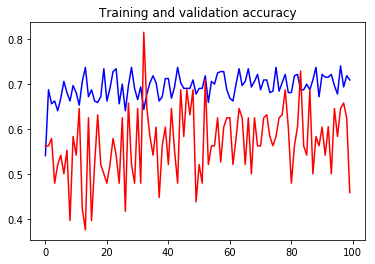

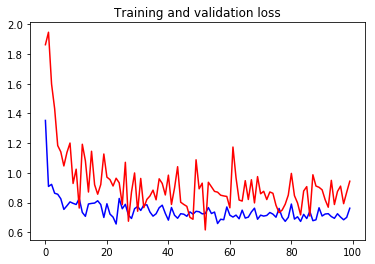

In [45]:
plot_training(history_transfer)

### Can we do some fine tuning 

- Unfreezing modules at the end and see what works?
- Any other techniques?

[Research more here] : Good homework for you guys and me! 😁

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

### (Optional) Can we come back and unfreeze layers at the tail? 

Unfreeze the last X number of layers in the model and train these as well?
try only for inception

In [57]:
# Does it help if we unfreeze some layers up front
# reminder to self, come back if the accuracies don't improve



### Let's Compile again

What happens if we slow down the learning rate?

In [58]:
from keras.optimizers import #your optimizer

# use with slow learning rate and momentum to standard value
model.compile(optimizer=adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [59]:
# Save the mode wirth best validation loss

checkpointer = ModelCheckpoint("saved_model/fine_tuning.hdf5",
                              verbose = 1,
                              save_best_only = True,
                              monitor = "val_loss")

# Also we ensure that training stops if the validation loss doesn't improve

stoptheshow = EarlyStopping(monitor = 'val_loss, val_acc',
                           min_delta = 0.1,
                           patience = 2,
                           verbose = 1,
                           mode = 'auto')

#### Train this baby again!

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=20,
                              validation_data = valid_generator,
                              validation_steps = 3,
                              epochs = 100,
                              verbose = 1,
                              callbacks = [checkpointer]
                             )

## Step 7:  Let's write our Prediction Function

1. First load the model you just saved
2. Then we write the prediction function
3. Then we predict :)

In [62]:
# Step 1 : load the trained model
model.load_weights('saved_model/fine_tuning.hdf5')

In [63]:
# Predict
from keras.preprocessing.image import img_to_array, load_img
import cv2

def predict_cancer(img_path):
    # first we load img and set targt size of our input model
    img = load_img(img_path, target_size = (299, 299))
    x = img_to_array(img)                 # coverting image to array
    x = np.expand_dims(x, axis=0)         # transform arrray to form a (1, x, y, z)
    x = preprocess_input(x)               # use preprocess input function , subtract the mean of all images
    p = np.argmax(model.predict(x))       # Store the argmax the predictions
    
    if p == 0:
        print("melanoma")
    elif p == 1:
        print("nevus")
    elif p == 2:
        print("seborrheic_keratosis")

In [ ]:
predict_cancer("data/test/melanoma/ISIC_0014181.jpg")
z = plt.imread("data/test/melanoma/ISIC_0014181.jpg")
plt.imshow(z)

In [ ]:
predict_cancer("data/test/nevus/ISIC_0012551.jpg")
z = plt.imread("data/test/nevus/ISIC_0012551.jpg")
plt.imshow(z)

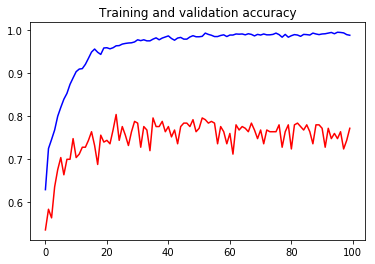

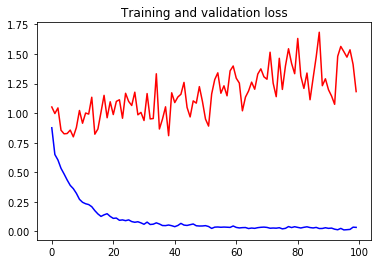

In [67]:
# plot training accuracy

### What observations do you make?

Are you overfitting or underfitting? 

What can you do to improve it?

Tip: Yes your assumption is true - although if you’re underfitting due to reasons other than dropout (or other regularization techniques), you won’t see this.

The key technique to avoiding or circumventing underfitting is using a model with
- plenty of layers and parameters
- unfreeze and try to build yourself
- Get more data (scrape the heck out of the web and get more data so your model can learn better)
- picking an different architectures (e.g. CNN with batchnorm for images). Also picking appropriate learning rates.

Interesting [explanation](https://www.youtube.com/watch?v=6kwQEBMandw&feature=youtu.be&t=4463) (not that I fully agree with all that he says)



## Ideas to Improve Algorithm Performance

This list of ideas is not complete but it is a great start.


I have divided the list into 4 sub-topics:

### Improve Performance With Data.
### Improve Performance With Algorithms.
### Improve Performance With Algorithm Tuning.
### Improve Performance With Ensembles.


The gains often get smaller the further down the list. For example, a new framing of your problem or more data is often going to give you more payoff than tuning the parameters of your best performing algorithm. Not always, but in general.

I have included lots of links to tutorials from the blog, questions from related sites as well as questions on the classic Neural Net FAQ.

Some of the ideas are specific to artificial neural networks, but many are quite general. General enough that you could use them to spark ideas on improving your performance with other techniques.

Let’s dive in.

### 1. Improve Performance With Data

You can get big wins with changes to your training data and problem definition. Perhaps even the biggest wins.

Here’s a short list of what we’ll cover:

Get More Data.
Invent More Data.
Rescale Your Data.
Transform Your Data.
Feature Selection.
#### 1) Get More Data

Can you get more training data?

The quality of your models is generally constrained by the quality of your training data. You want the best data you can get for your problem.

You also want lots of it.

Deep learning and other modern nonlinear machine learning techniques get better with more data. Deep learning especially. It is one of the main points that make deep learning so exciting.

Take a look at the following cartoon:

Why Deep Learning?
Why Deep Learning?
Slide by Andrew Ng, all rights reserved.
More data does not always help, but it can. If I am given the choice, I will get more data for the optionality it provides.

Related:

Datasets Over Algorithms
#### 2) Invent More Data

Deep learning algorithms often perform better with more data.

We mentioned this in the last section.

If you can’t reasonably get more data, you can invent more data.

If your data are vectors of numbers, create randomly modified versions of existing vectors.
If your data are images, create randomly modified versions of existing images.
If your data are text, you get the idea…
Often this is called data augmentation or data generation.

You can use a generative model. You can also use simple tricks.

For example, with photograph image data, you can get big gains by randomly shifting and rotating existing images. It improves the generalization of the model to such transforms in the data if they are to be expected in new data.

This is also related to adding noise, what we used to call adding jitter. It can act like a regularization method to curb overfitting the training dataset.

Related:

Image Augmentation for Deep Learning With Keras
What is jitter? (Training with noise)
#### 3) Rescale Your Data

This is a quick win.

A traditional rule of thumb when working with neural networks is:

Rescale your data to the bounds of your activation functions.

If you are using sigmoid activation functions, rescale your data to values between 0-and-1. If you’re using the Hyperbolic Tangent (tanh), rescale to values between -1 and 1.

This applies to inputs (x) and outputs (y). For example, if you have a sigmoid on the output layer to predict binary values, normalize your y values to be binary. If you are using softmax, you can still get benefit from normalizing your y values.

This is still a good rule of thumb, but I would go further.

I would suggest that you create a few different versions of your training dataset as follows:

Normalized to 0 to 1.
Rescaled to -1 to 1.
Standardized.
Then evaluate the performance of your model on each. Pick one, then double down.

If you change your activation functions, repeat this little experiment.

Big values accumulating in your network are not good. In addition, there are other methods for keeping numbers small in your network such as normalizing activation and weights, but we’ll look at these techniques later.

Related:

Should I standardize the input variables (column vectors)?
How To Prepare Your Data For Machine Learning in Python with Scikit-Learn
#### 4) Transform Your Data

Related to rescaling suggested above, but more work.

You must really get to know your data. Visualize it. Look for outliers.

Guesstimate the univariate distribution of each column.

Does a column look like a skewed Gaussian, consider adjusting the skew with a Box-Cox transform.
Does a column look like an exponential distribution, consider a log transform.
Does a column look like it has some features, but they are being clobbered by something obvious, try squaring, or square-rooting.
Can you make a feature discrete or binned in some way to better emphasize some feature.
Lean on your intuition. Try things.

Can you pre-process data with a projection method like PCA?
Can you aggregate multiple attributes into a single value?
Can you expose some interesting aspect of the problem with a new boolean flag?
Can you explore temporal or other structure in some other way?
Neural nets perform feature learning. They can do this stuff.

But they will also learn a problem much faster if you can better expose the structure of the problem to the network for learning.

Spot-check lots of different transforms of your data or of specific attributes and see what works and what doesn’t.

Related:

How to Define Your Machine Learning Problem
Discover Feature Engineering, How to Engineer Features and How to Get Good at It
How To Prepare Your Data For Machine Learning in Python with Scikit-Learn
#### 5) Feature Selection

Neural nets are generally robust to unrelated data.

They’ll use a near-zero weight and sideline the contribution of non-predictive attributes.

Still, that’s data, weights, training cycles used on data not needed to make good predictions.

Can you remove some attributes from your data?

There are lots of feature selection methods and feature importance methods that can give you ideas of features to keep and features to boot.

Try some. Try them all. The idea is to get ideas.

Again, if you have time, I would suggest evaluating a few different selected “Views” of your problem with the same network and see how they perform.

Maybe you can do as well or better with fewer features. Yay, faster!
Maybe all the feature selection methods boot the same specific subset of features. Yay, consensus on useless features.
Maybe a selected subset gives you some ideas on further feature engineering you can perform. Yay, more ideas.
Related:

An Introduction to Feature Selection
Feature Selection For Machine Learning in Python
#### 6) Reframe Your Problem

Step back from your problem.

Are the observations that you’ve collected the only way to frame your problem?

Maybe there are other ways. Maybe other framings of the problem are able to better expose the structure of your problem to learning.

I really like this exercise because it forces you to open your mind. It’s hard. Especially if you’re invested (ego!!!, time, money) in the current approach.

Even if you just list off 3-to-5 alternate framings and discount them, at least you are building your confidence in the chosen approach.

Maybe you can incorporate temporal elements in a window or in a method that permits timesteps.
Maybe your classification problem can become a regression problem, or the reverse.
Maybe your binary output can become a softmax output?
Maybe you can model a sub-problem instead.
It is a good idea to think through the problem and it’s possible framings before you pick up the tool, because you’re less invested in solutions.

Nevertheless, if you’re stuck, this one simple exercise can deliver a spring of ideas.

Also, you don’t have to throw away any of your prior work. See the ensembles section later on.

Related:

How to Define Your Machine Learning Problem
### 2. Improve Performance With Algorithms

Machine learning is about algorithms.

All the theory and math describes different approaches to learn a decision process from data (if we constrain ourselves to predictive modeling).

You’ve chosen deep learning for your problem. Is it really the best technique you could have chosen?

In this section, we’ll touch on just a few ideas around algorithm selection before next diving into the specifics of getting the most from your chosen deep learning method.

Here’s the short list

Spot-Check Algorithms.
Steal From Literature.
Resampling Methods.
Let’s get into it.

#### 1) Spot-Check Algorithms

Brace yourself.

You cannot know which algorithm will perform best on your problem beforehand.

If you knew, you probably would not need machine learning.

What evidence have you collected that your chosen method was a good choice?

Let’s flip this conundrum.

No single algorithm can perform better than any other, when performance is averaged across all possible problems. All algorithms are equal. This is a summary of the finding from the no free lunch theorem.

Maybe your chosen algorithms is not the best for your problem.

Now, we are not trying to solve all possible problems, but the new hotness in algorithm land may not be the best choice on your specific dataset.

My advice is to collect evidence. Entertain the idea that there are other good algorithms and given them a fair shot on your problem.

Spot-check a suite of top methods and see which fair well and which do not.

Evaluate some linear methods like logistic regression and linear discriminate analysis.
Evaluate some tree methods like CART, Random Forest and Gradient Boosting.
Evaluate some instance methods like SVM and kNN.
Evaluate some other neural network methods like LVQ, MLP, CNN, LSTM, hybrids, etc.
Double down on the top performers and improve their chance with some further tuning or data preparation.

Rank the results against your chosen deep learning method, how do they compare?

Maybe you can drop the deep learning model and use something a lot simpler, a lot faster to train, even something that is easy to understand.

Related:

A Data-Driven Approach to Machine Learning
Why you should be Spot-Checking Algorithms on your Machine Learning Problems
Spot-Check Classification Machine Learning Algorithms in Python with scikit-learn
#### 2) Steal From Literature

A great shortcut to picking a good method, is to steal ideas from literature.

Who else has worked on a problem like yours and what methods did they use.

Check papers, books, blog posts, Q&A sites, tutorials, everything Google throws at you.

Write down all the ideas and work your way through them.

This is not about replicating research, it is about new ideas that you have not thought of that may give you a lift in performance.

Published research is highly optimized.

There are a lot of smart people writing lots of interesting things. Mine this great library for the nuggets you need.

Related:

How to Research a Machine Learning Algorithm
Google Scholar
#### 3) Resampling Methods

You must know how good your models are.

Is your estimate of the performance of your models reliable?

Deep learning methods are slow to train.

This often means we cannot use gold standard methods to estimate the performance of the model such as k-fold cross validation.

Maybe you are using a simple train/test split, this is very common. If so, you need to ensure that the split is representative of the problem. Univariate stats and visualization are a good start.
Maybe you can exploit hardware to improve the estimates. For example, if you have a cluster or an Amazon Web Services account, we can train n-models in parallel then take the mean and standard deviation of the results to get a more robust estimate.
Maybe you can use a validation hold out set to get an idea of the performance of the model as it trains (useful for early stopping, see later).
Maybe you can hold back a completely blind validation set that you use only after you have performed model selection.
Going the other way, maybe you can make the dataset smaller and use stronger resampling methods.

Maybe you see a strong correlation with the performance of the model trained on a sample of the training dataset as to one trained on the whole dataset. Perhaps you can perform model selection and tuning using the smaller dataset, then scale the final technique up to the full dataset at the end.
Maybe you can constrain the dataset anyway, take a sample and use that for all model development.
You must have complete confidence in the performance estimates of your models.

Related:

Evaluate the Performance Of Deep Learning Models in Keras
Evaluate the Performance of Machine Learning Algorithms in Python using Resampling
### 3. Improve Performance With Algorithm Tuning

This is where the meat is.

You can often unearth one or two well-performing algorithms quickly from spot-checking. Getting the most from those algorithms can take, days, weeks or months.

Here are some ideas on tuning your neural network algorithms in order to get more out of them.

- Diagnostics.
- Weight Initialization.
- Learning Rate.
- Activation Functions.
- Network Topology.
- Batches and Epochs.
- Regularization.
- Optimization and Loss.
- 
Early Stopping.
You may need to train a given “configuration” of your network many times (3-10 or more) to get a good estimate of the performance of the configuration. This probably applies to all the aspects that you can tune in this section.

For a good post on hyperparameter optimization see:

How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras
#### 1) Diagnostics

You will get better performance if you know why performance is no longer improving.

Is your model overfitting or underfitting?

Always keep this question in mind. Always.

It will be doing one or the other, just by varying degrees.

A quick way to get insight into the learning behavior of your model is to evaluate it on the training and a validation dataset each epoch, and plot the results.

Plot of Model Accuracy on Train and Validation Datasets
Plot of Model Accuracy on Train and Validation Datasets
If training is much better than the validation set, you are probably overfitting and you can use techniques like regularization.
If training and validation are both low, you are probably underfitting and you can probably increase the capacity of your network and train more or longer.
If there is an inflection point when training goes above the validation, you might be able to use early stopping.
Create these plots often and study them for insight into the different techniques you can use to improve performance.

These plots might be the most valuable diagnostics you can create.

Another useful diagnostic is to study the observations that the network gets right and wrong.

On some problems, this can give you ideas of things to try.

Perhaps you need more or augmented examples of the difficult-to-train on examples.
Perhaps you can remove large samples of the training dataset that are easy to model.
Perhaps you can use specialized models that focus on different clear regions of the input space.
Related

Display Deep Learning Model Training History in Keras
Overfitting and Underfitting With Machine Learning Algorithms
#### 2) Weight Initialization

The rule of thumb used to be:

Initialize using small random numbers.

In practice, that is still probably good enough. But is it the best for your network?

There are also heuristics for different activation functions, but I don’t remember seeing much difference in practice.

Keep your network fixed and try each initialization scheme.

Remember, the weights are the actual parameters of your model that you are trying to find. There are many sets of weights that give good performance, but you want better performance.

Try all the different initialization methods offered and see if one is better with all else held constant.
Try pre-learning with an unsupervised method like an autoencoder.
Try taking an existing model and retraining a new input and output layer for your problem (transfer learning)
Remember, changing the weight initialization method is closely tied with the activation function and even the optimization function.

Related

Initialization of deep networks
#### 3) Learning Rate

There is often payoff in tuning the learning rate.

Here are some ideas of things to explore:

Experiment with very large and very small learning rates.
Grid search common learning rate values from the literature and see how far you can push the network.
Try a learning rate that decreases over epochs.
Try a learning rate that drops every fixed number of epochs by a percentage.
Try adding a momentum term then grid search learning rate and momentum together.
Larger networks need more training, and the reverse. If you add more neurons or more layers, increase your learning rate.

Learning rate is coupled with the number of training epochs, batch size and optimization method.

Related:

Using Learning Rate Schedules for Deep Learning Models in Python with Keras
What learning rate should be used for backprop?
#### 4) Activation Functions

You probably should be using rectifier activation functions.

They just work better.

Before that it was sigmoid and tanh, then a softmax, linear or sigmoid on the output layer. I don’t recommend trying more than that unless you know what you’re doing.

Try all three though and rescale your data to meet the bounds of the functions.

Obviously, you want to choose the right transfer function for the form of your output, but consider exploring different representations.

For example, switch your sigmoid for binary classification to linear for a regression problem, then post-process your outputs. This may also require changing the loss function to something more appropriate. See the section on Data Transforms for more ideas along these lines.
Related:

Why use activation functions?
#### 5) Network Topology

Changes to your network structure will pay off.

How many layers and how many neurons do you need?

No one knows. No one. Don’t ask.

You must discover a good configuration for your problem. Experiment.

Try one hidden layer with a lot of neurons (wide).
Try a deep network with few neurons per layer (deep).
Try combinations of the above.
Try architectures from recent papers on problems similar to yours.
Try topology patterns (fan out then in) and rules of thumb from books and papers (see links below).
It’s hard. Larger networks have a greater representational capability, and maybe you need it.

More layers offer more opportunity for hierarchical re-composition of abstract features learned from the data. Maybe you need that.

Later networks need more training, both in epochs and in learning rate. Adjust accordingly.
Related:

These links will give you lots of ideas of things to try, well they do for me.

How many hidden layers should I use?
How many hidden units should I use?
#### 6) Batches and Epochs

The batch size defines the gradient and how often to update weights. An epoch is the entire training data exposed to the network, batch-by-batch.

Have you experimented with different batch sizes and number of epochs?

Above, we have commented on the relationship between learning rate, network size and epochs.

Small batch sizes with large epoch size and a large number of training epochs are common in modern deep learning implementations.

This may or may not hold with your problem. Gather evidence and see.

Try batch size equal to training data size, memory depending (batch learning).
Try a batch size of one (online learning).
Try a grid search of different mini-batch sizes (8, 16, 32, …).
Try training for a few epochs and for a heck of a lot of epochs.
Consider a near infinite number of epochs and setup check-pointing to capture the best performing model seen so far, see more on this further down.

Some network architectures are more sensitive than others to batch size. I see Multilayer Perceptrons as often robust to batch size, whereas LSTM and CNNs quite sensitive, but that is just anecdotal.

Related

What are batch, incremental, on-line … learning?
Intuitively, how does mini-batch size affect the performance of (stochastic) gradient descent?
#### 7) Regularization

Regularization is a great approach to curb overfitting the training data.

The hot new regularization technique is dropout, have you tried it?

Dropout randomly skips neurons during training, forcing others in the layer to pick up the slack. Simple and effective. Start with dropout.

Grid search different dropout percentages.
Experiment with dropout in the input, hidden and output layers.
There are extensions on the dropout idea that you can also play with like drop connect.

Also consider other more traditional neural network regularization techniques , such as:

Weight decay to penalize large weights.
Activation constraint, to penalize large activations.
Experiment with the different aspects that can be penalized and with the different types of penalties that can be applied (L1, L2, both).

Related:

Dropout Regularization in Deep Learning Models With Keras
What is Weight Decay?
#### 8) Optimization and Loss

It used to be stochastic gradient descent, but now there are a ton of optimizers.

Have you experimented with different optimization procedures?

Stochastic Gradient Descent is the default. Get the most out of it first, with different learning rates, momentum and learning rate schedules.

Many of the more advanced optimization methods offer more parameters, more complexity and faster convergence. This is good and bad, depending on your problem.

To get the most out of a given method, you really need to dive into the meaning of each parameter, then grid search different values for your problem. Hard. Time Consuming. It might payoff.

I have found that newer/popular methods can converge a lot faster and give a quick idea of the capability of a given network topology, for example:

ADAM
RMSprop
You can also explore other optimization algorithms such as the more traditional (Levenberg-Marquardt) and the less so (genetic algorithms). Other methods can offer good starting places for SGD and friends to refine.

The loss function to be optimized might be tightly related to the problem you are trying to solve.

Nevertheless, you often have some leeway (MSE and MAE for regression, etc.) and you might get a small bump by swapping out the loss function on your problem. This too may be related to the scale of your input data and activation functions that are being used.

Related:

An overview of gradient descent optimization algorithms
What are conjugate gradients, Levenberg-Marquardt, etc.?
On Optimization Methods for Deep Learning, 2011 [PDF]
#### 9) Early Stopping

You can stop learning once performance starts to degrade.

This can save a lot of time, and may even allow you to use more elaborate resampling methods to evaluate the performance of your model.

Early stopping is a type of regularization to curb overfitting of the training data and requires that you monitor the performance of the model on training and a held validation datasets, each epoch.

Once performance on the validation dataset starts to degrade, training can stop.

You can also setup checkpoints to save the model if this condition is met (measuring loss of accuracy), and allow the model to keep learning.

Checkpointing allows you to do early stopping without the stopping, giving you a few models to choose from at the end of a run.

Related:

How to Check-Point Deep Learning Models in Keras
What is early stopping?
### 4. Improve Performance With Ensembles

You can combine the predictions from multiple models.

After algorithm tuning, this is the next big area for improvement.

In fact, you can often get good performance from combining the predictions from multiple “good enough” models rather than from multiple highly tuned (and fragile) models.

We’ll take a look at three general areas of ensembles you may want to consider:

Combine Models.
Combine Views.
Stacking.
#### 1) Combine Models

Don’t select a model, combine them.

If you have multiple different deep learning models, each that performs well on the problem, combine their predictions by taking the mean.

The more different the models, the better. For example, you could use very different network topologies or different techniques.

The ensemble prediction will be more robust if each model is skillful but in different ways.

Alternately, you can experiment with the converse position.

Each time you train the network, you initialize it with different weights and it converges to a different set of final weights. Repeat this process many times to create many networks, then combine the predictions of these networks.

Their predictions will be highly correlated, but it might give you a small bump on those patterns that are harder to predict.

Related:

Ensemble Machine Learning Algorithms in Python with scikit-learn
How to Improve Machine Learning Results
#### 2) Combine Views

As above, but train each network on a different view or framing of your problem.

Again, the objective is to have models that are skillful, but in different ways (e.g. uncorrelated predictions).

You can lean on the very different scaling and transform techniques listed above in the Data section for ideas.

The more different the transforms and framing of the problem used to train the different models, the more likely your results will improve.

Using a simple mean of predictions would be a good start.

#### 3) Stacking

You can also learn how to best combine the predictions from multiple models.

This is called **stacked generalization** or stacking for short.

Often you can get better results over that of a mean of the predictions using simple linear methods like regularized regression that learns how to weight the predictions from different models.

Baseline reuslts using the mean of the predictions from the submodels, but lift performance with learned weightings of the models.

Stacked Generalization (Stacking)

### Conclusions

You made it.

**Additional Resources**

There’s a lot of good resources, but few tie all the ideas together.



- Neural Network FAQ
- How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras
- Must Know Tips/Tricks in Deep Neural Networks
- How to increase validation accuracy with deep neural net?